In [2]:
import numpy as np
import pandas as pd
import time
from numpy import random
import matplotlib.pyplot as plt
from timeit import timeit

In [12]:
df = pd.read_csv('clear.csv', index_col=False, header=0, delimiter=';',
                names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])


In [13]:
arr = df.values

In [81]:
def perf(inp, statement, grid=None):
    length = len(inp)
    gap = int(length/5)
    if grid is None:
        grid = np.array([10, 100, 1000, 10000, 100000, 1000000])
    num = 100
    time = []
    df = {'pd': pd, 'np': np}
    for i in grid:
        if isinstance(inp, pd.DataFrame):
            sel = inp.iloc[:i]
            df['df'] = sel
        else:
            sel = inp[:i]
            df['arr'] = sel
        t = timeit(stmt=statement, globals=df, number=num)
        time.append(t/num)
    return grid, np.array(time)

In [82]:
def bench(pd_inp, pd_stmt, np_inp, np_stmt, title="", grid=None):
    g,v1 = perf(pd_inp, pd_stmt, grid)
    g,v2 = perf(np_inp, np_stmt, grid)
    fig, ax = plt.subplots()
    ax.loglog()
    ax.plot(g, v1, label="pandas",marker="o", lw=2)
    ax.plot(g, v2, label="numpy", marker="v", lw=2)
    ax.set_xticks(g)
    plt.legend(loc=2)
    plt.xlabel("Number of Records")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.xlim(min(g)/2,max(g)*2)
    plt.title(title)
    plt.show()


__TASK 1__ 

__Обрати всі рядки, у яких загальна активна споживана
потужність перевищує 5 кВт.__

In [22]:
%%timeit
arr[arr[:, 2] > 5] 

74.8 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
df[df['Global_active_power']>5]

6.1 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


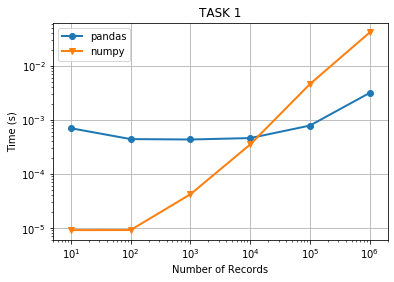

In [83]:
bench(df, "df[df['Global_active_power'] > 5]",
          arr, "arr[arr[:, 2] > 5]",
          title="TASK 1")


__TASK 2__ 

__Обрати всі рядки, у яких вольтаж перевищую 235 В.__

In [34]:
%%timeit

arr[np.where(arr[:, 4] > 235)]

361 ms ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%%timeit   
df[df['Voltage']>235]

190 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


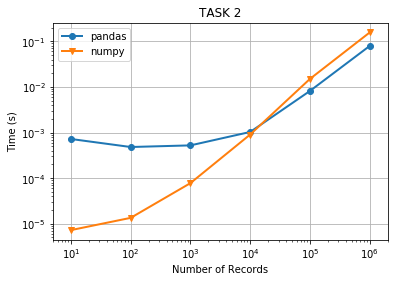

In [84]:
bench(df, "df[df['Voltage']>235]",
          arr, "arr[np.where(arr[:, 4] > 235)]",
          title="TASK 2")

__TASK 3__

__Oбрати всі рядки, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних(7) споживають більше, ніж бойлер та кондиціонер(8).__

In [35]:
%%timeit
arr[(arr[:,5]>19)&(arr[:,5]<20)&(arr[:,7]>arr[:,8])]

197 ms ± 27.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
df[(df['Global_intensity']>19) & (df['Global_intensity']<20) & (df['Sub_metering_2']>df['Sub_metering_3'])]

20.1 ms ± 656 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


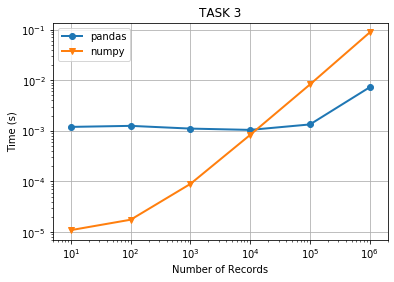

In [85]:
bench(df, "df[(df['Global_intensity']>19) & (df['Global_intensity']<20) & (df['Sub_metering_2']>df['Sub_metering_3'])]",
          arr, "arr[(arr[:,5]>19)&(arr[:,5]<20)&(arr[:,7]>arr[:,8])]",
          title="TASK 3")

__TASK 4__

__Обрати випадковим чином 50000 рядків (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.__

In [40]:
df1 = df.sample(50000)
arr1 = df1.values

In [45]:
%%time

av1 = np.mean(arr1[:,6])
av2 = np.mean(arr1[:,7])
av3 = np.mean(arr1[:,8])

Wall time: 0 ns


In [46]:
%%time

av1= df1['Sub_metering_1'].mean()
av2= df1['Sub_metering_2'].mean()
av3= df1['Sub_metering_3'].mean()
    

Wall time: 0 ns


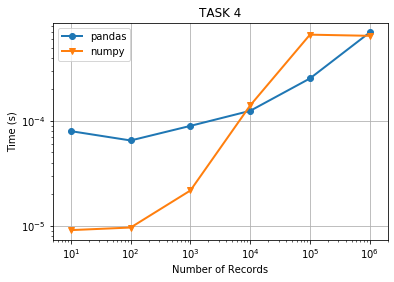

In [93]:
#сделала для одного
bench(df1, "df['Sub_metering_1'].mean()",
              arr1, "np.mean(arr[:,6])",
              title="TASK 4")

__TASK 5__

__Обрати ті рядки, які по часу >= 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.__

In [88]:
array = arr[(arr[:, 1] > '18:00:00') & ((arr[:, 2] +  arr[:,3]) > 6) & (arr[:, 7] > arr[:, 6]) &(arr[:, 7] > arr[:, 8])]
filtered_df = df[(df['Time']>'18:00:00')&((df['Global_active_power']+df['Global_reactive_power'])>6)&(df['Sub_metering_2']>df['Sub_metering_1'])&(df['Sub_metering_2']>df['Sub_metering_3'])]

In [74]:
%%timeit
array1 = array[:len(array)//2+1:3]
array2 = array[len(array)//2+1::4]

928 ns ± 12.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [75]:
%%timeit
df1 = df[:len(df.index)//2+1:3]
df2 = df[len(df.index)//2+1::4]

167 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


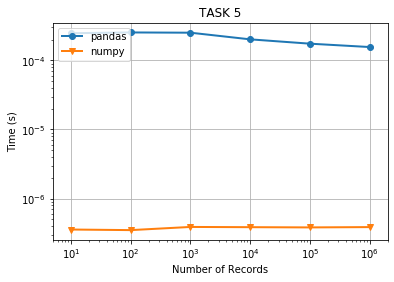

In [87]:
bench(filtered_df, "df[:len(df.index)//2+1:3]",
              array, "arr[:len(arr)//2+1:3]",
              title="TASK 5")